In [1]:
from collections import Counter
import matplotlib.pyplot as plt
import random
import requests
import timeit
from bs4 import BeautifulSoup
import time
import pandas as pd
import seaborn as sns

In [2]:
ADDR = 'localhost'
PORT = 4000
REPEAT= 1000

CODES = Counter()
CODES2 = []

PHONES = ['IP12', 'IP13P', 'REA5', 'REAX2']

In [3]:
def get():
    r = requests.get("http://{}:{}".format(ADDR, PORT))
    html = BeautifulSoup(r.text)
    CODES[r.status_code] += 1
    CODES2.append(r.status_code)
    return r

def post():
    r = requests.post("http://{}:{}/add".format(ADDR, PORT), data={'quantity': 1, 'code': random.choice(PHONES)})
    CODES[r.status_code] += 1
    CODES2.append(r.status_code)
    return r
    
def static():
    r = requests.get("http://{}:{}/static/images/Iphone_13Pro.jpeg".format(ADDR, PORT))
    CODES[r.status_code] += 1
    CODES2.append(r.status_code)
    return r


# Test 1- Sprawdzenie jakie maszyny obsluguja kolejne zapytania o strone glowna

In [4]:
counter = 0
result_list = list()
for i in range(60):
    r = get()
    html = BeautifulSoup(r.text)
    vm_name = html.title.text.split(":")[-1]
    result = {
        'vm_name': vm_name,
        'time': counter,
        'y': 1
    }
    result_list.append(result)
    counter = 4*i
    time.sleep(4)

In [5]:
df = pd.DataFrame(result_list)

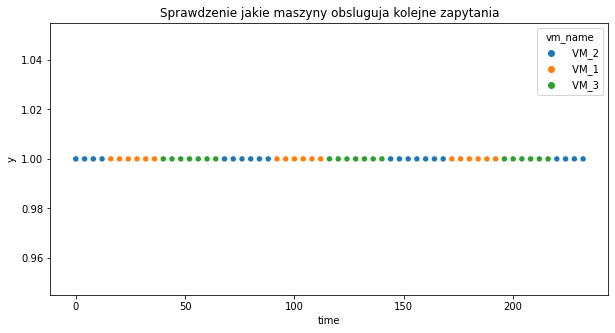

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x='time', y='y', hue='vm_name', data=df)
plt.title('Sprawdzenie jakie maszyny obsluguja kolejne zapytania')
plt.show()

In [7]:
from matplotlib.ticker import FormatStrFormatter

# Test 2-Sprawdzenie czasu odpowiedzi dla paczki 1000 zapytań o strone glowna

In [8]:
counter = 0
test2_result = list()
REPEAT= 1000

for i in range(60):
    result_time = timeit.repeat(get, repeat=REPEAT, number=1)
    total_time = sum(result_time)
    mean_time = total_time/REPEAT
    result = {
        'mean_time': mean_time,
        'total_time': total_time,
        'indx': i
    }
    test2_result.append(result)
    time.sleep(1)

In [9]:
test2_df = pd.DataFrame(test2_result)

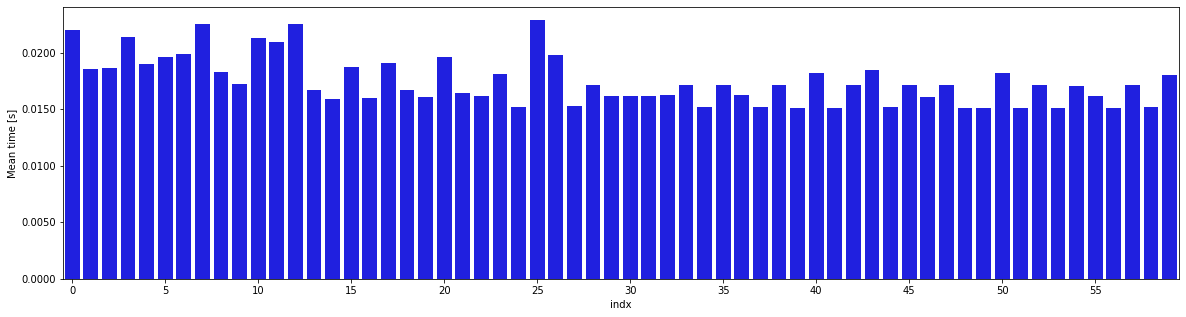

In [10]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x='indx', y='mean_time', data=test2_df, color='blue')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
ax.set_ylabel('Mean time [s]')
ax.set(xticks=(range(0, 60, 5)))
plt.show()

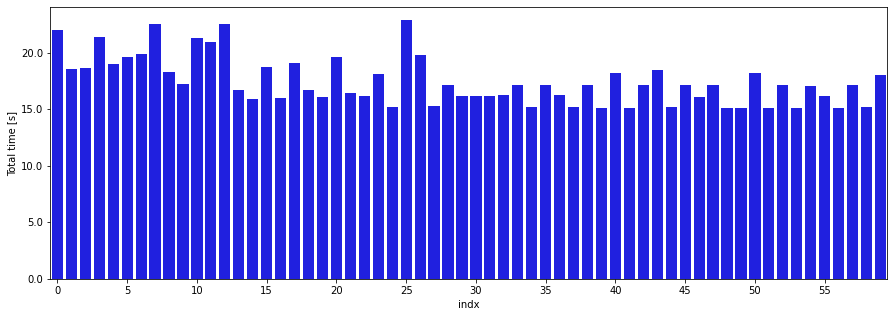

In [11]:
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x='indx', y='total_time', data=test2_df, color='blue')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.set_ylabel('Total time [s]')
ax.set(xticks=(range(0, 60, 5)))
plt.show()

# Test 3-Sprawdzenie czasu odpowiedzi dla paczki 1000 zapytań o statyczne  dane (obrazek)

In [12]:
counter = 0
test3_result = list()
REPEAT= 1000

for i in range(60):
    result_time = timeit.repeat(static, repeat=REPEAT, number=1)
    total_time = sum(result_time)
    mean_time = total_time/REPEAT
    result = {
        'mean_time': mean_time,
        'total_time': total_time,
        'indx': i
    }
    test3_result.append(result)
    time.sleep(1)

In [13]:
test3_df = pd.DataFrame(test3_result)

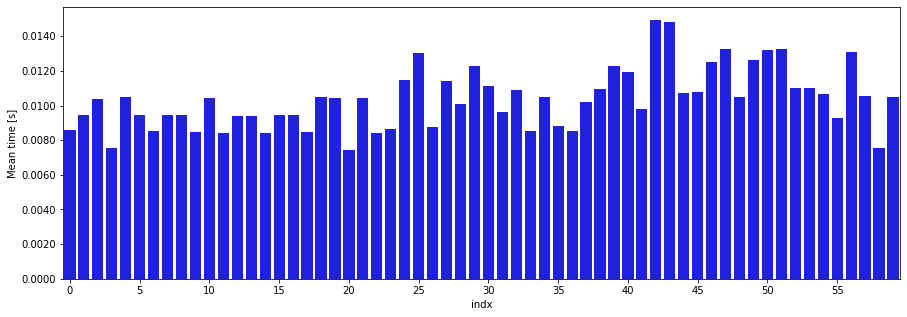

In [14]:
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x='indx', y='mean_time', data=test3_df, color='blue')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
ax.set_ylabel('Mean time [s]')
ax.set(xticks=(range(0, 60, 5)))
plt.show()

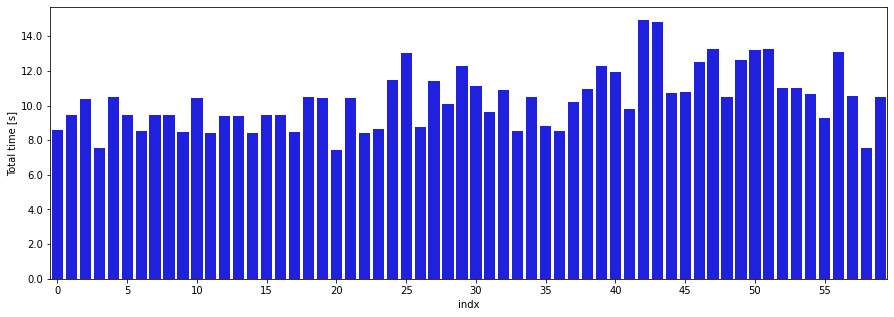

In [15]:
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x='indx', y='total_time', data=test3_df, color='blue')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.set_ylabel('Total time [s]')
ax.set(xticks=(range(0, 60, 5)))

plt.show()

# Test 4-Sprawdzenie czasu odpowiedzi dla paczki 1000 zapytań o dodanie telefonu do listy zakupowej

In [16]:
counter = 0
test4_result = list()
REPEAT= 1000

for i in range(60):
    result_time = timeit.repeat(post, repeat=REPEAT, number=1)
    total_time = sum(result_time)
    mean_time = total_time/REPEAT
    result = {
        'mean_time': mean_time,
        'total_time': total_time,
        'indx': i
    }
    test4_result.append(result)
    time.sleep(1)

In [17]:
test4_df = pd.DataFrame(test4_result)

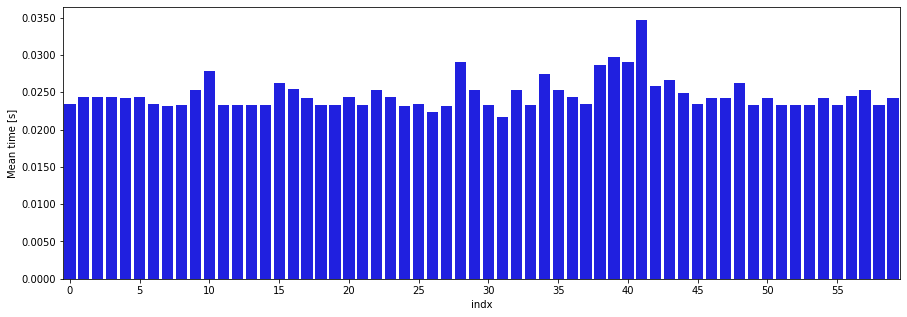

In [18]:
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x='indx', y='mean_time', data=test4_df, color='blue')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
ax.set_ylabel('Mean time [s]')
ax.set(xticks=(range(0, 60, 5)))

plt.show()

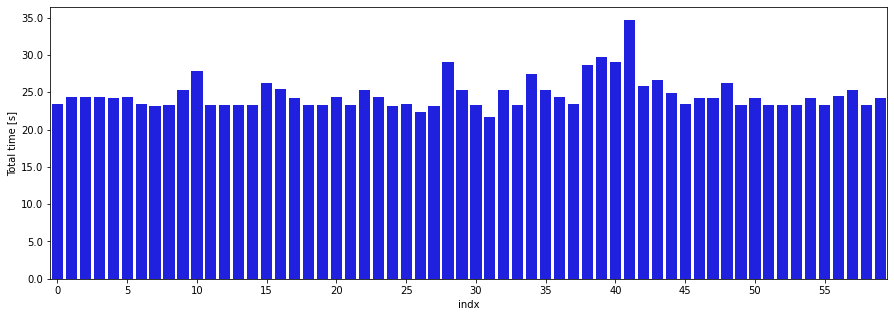

In [19]:
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x='indx', y='total_time', data=test4_df, color='blue')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.set_ylabel('Total time [s]')
ax.set(xticks=(range(0, 60, 5)))

plt.show()

# Testy wydajnosci dla zmiennej ilosci rownoległych klientow wysylajacych 1000 zapytan

In [20]:
import aiohttp
import asyncio
import nest_asyncio
nest_asyncio.apply()

In [21]:
test5_result = list()

In [22]:
# Z uruchomionym kontrolerem - 1 serwer rotujacy

In [23]:
async def client():
    async with aiohttp.ClientSession() as session:
        times = timeit.repeat(get, repeat=1000, number=1)
        return sum(times)

loop = asyncio.get_event_loop()
for c in [2, 3, 5, 8, 10]:
    a = loop.run_until_complete(
        asyncio.gather(*[client() for i in range(c)]))
    mean_time = sum(a)/c
    result = {
        'type': '1 roteded',
        'number_clients': c,
        'mean_time': mean_time
    }
    test5_result.append(result)

In [24]:
test5_result

[{'type': '1 roteded', 'number_clients': 2, 'mean_time': 15.717144487571204},
 {'type': '1 roteded', 'number_clients': 3, 'mean_time': 15.503222703414698},
 {'type': '1 roteded', 'number_clients': 5, 'mean_time': 15.15741211187851},
 {'type': '1 roteded', 'number_clients': 8, 'mean_time': 15.062087134439935},
 {'type': '1 roteded', 'number_clients': 10, 'mean_time': 15.740922413041698}]

In [ ]:
# Bez kontrolera - 3 serwery obsluguja rzadania
# Odpowiednio wyłaczony kontroler i uruchomione serwery

In [ ]:
async def client():
    async with aiohttp.ClientSession() as session:
        times = timeit.repeat(get, repeat=1000, number=1)
        return sum(times)
    
loop = asyncio.get_event_loop()
for c in [2, 3, 5, 8, 10]:
    a = loop.run_until_complete(
        asyncio.gather(*[client() for i in range(c)]))
    mean_time = sum(a)/c
    result = {
        'type': '3 servers',
        'number_clients': c,
        'mean_time': mean_time
    }
    test5_result.append(result)

In [ ]:
test5_result

In [ ]:
# Bez kontrolera - 1 serwer obslugujacy rzadania
# Odpowiednio wyłaczony kontroler i uruchomiony 1 serwer 

In [ ]:
async def client():
    async with aiohttp.ClientSession() as session:
        times = timeit.repeat(get, repeat=1000, number=1)
        return sum(times)
    
loop = asyncio.get_event_loop()
for c in [2, 3, 5, 8, 10]:
    a = loop.run_until_complete(
        asyncio.gather(*[client() for i in range(c)]))
    mean_time = sum(a)/c
    result = {
        'type': '1 server',
        'number_clients': c,
        'mean_time': mean_time
    }
    test5_result.append(result)

In [ ]:
test5_result

In [ ]:
test5_df = pd.DataFrame(test5_result)

In [ ]:
test5_df

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x='number_clients', y='mean_time', hue='type',  data=test5_df)
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.set_ylabel('Mean time [s]', fontsize=20)
ax.set_xlabel('Number of clients', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# ax.set(xticks=(range(0, 60, 5)))
plt.legend(loc=1, prop={'size': 20})
plt.show()

# Testy  tabela

In [ ]:
REPEAT=10000
res = timeit.repeat(post, repeat=REPEAT, number=1)
print('Total time:', sum(res))
print('Mean time:', sum(res)/REPEAT)
print(CODES)

plt.scatter(range(REPEAT), res, s=1, color=list(map(lambda x: [0, 1, 0] if x == 200 else [1, 0, 0], CODES2)))
plt.ylabel('Total time')
plt.show()